In [1]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data from the csv file#
minutes_watched_2021_paid=pd.read_csv('minutes_watched_2021_paid_1.csv')
minutes_watched_2021_free=pd.read_csv('minutes_watched_2021_paid_0.csv')
minutes_watched_2022_free=pd.read_csv('minutes_watched_2022_paid_0.csv')
minutes_watched_2022_paid=pd.read_csv('minutes_watched_2022_paid_1.csv')

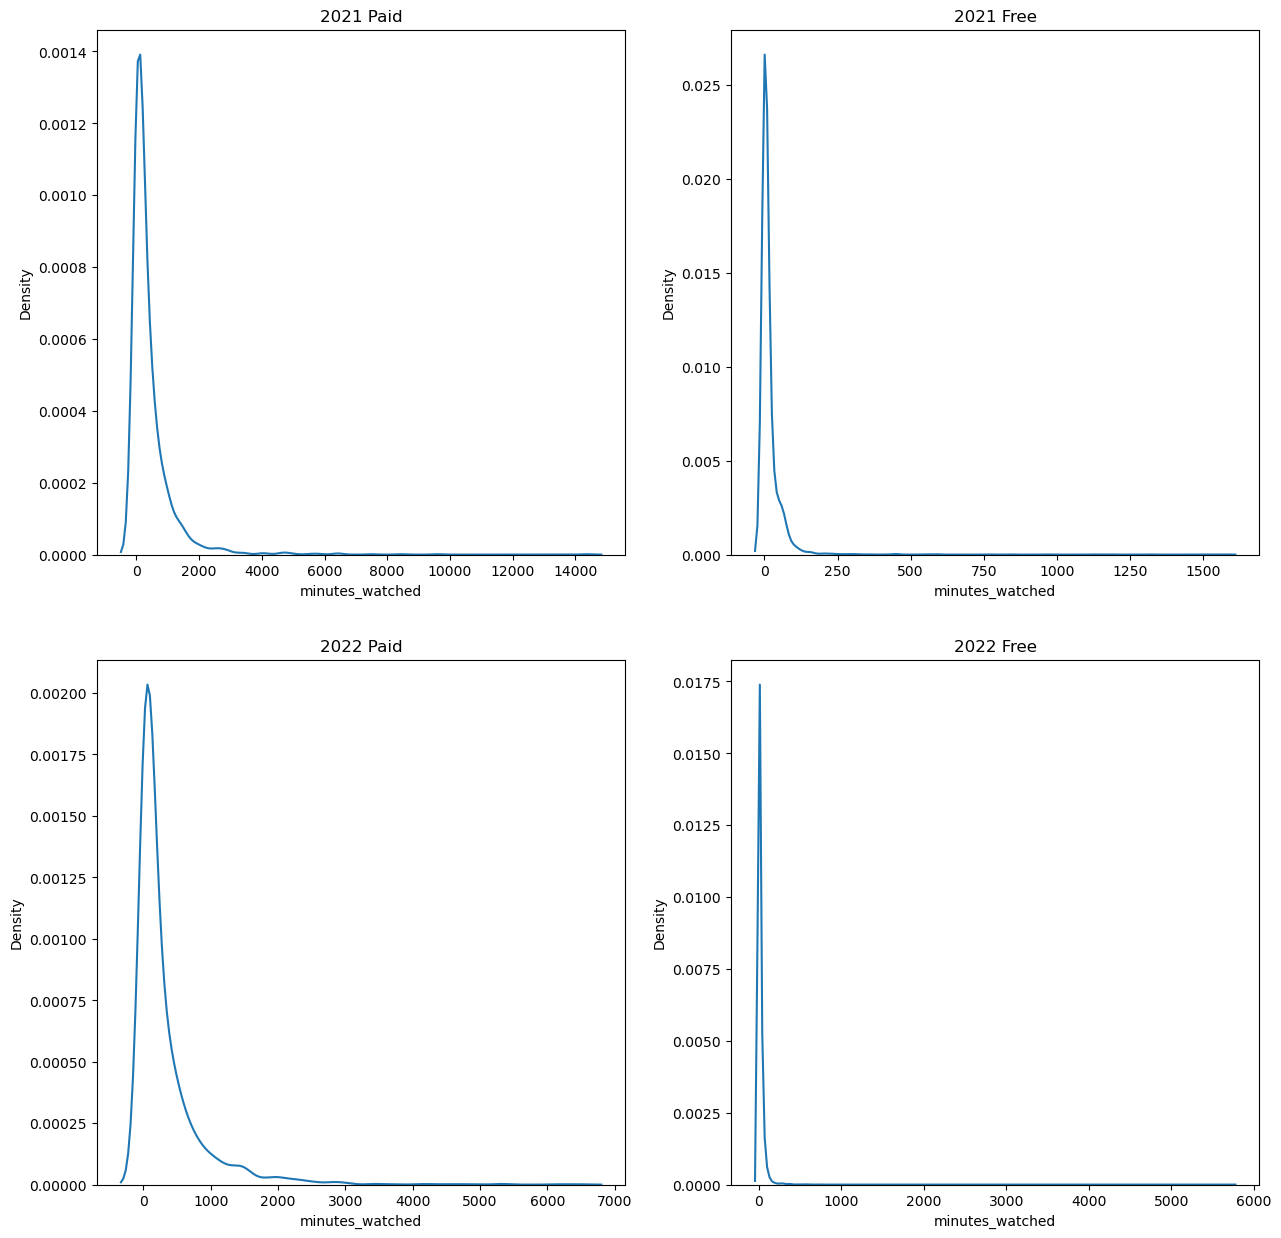

In [3]:
#plot the distribution of minutes watched 
#lets create subplot for the four datasets with kde plot
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(data=minutes_watched_2021_paid, x='minutes_watched', ax=axs[0, 0])
axs[0, 0].set_title('2021 Paid')
sns.kdeplot(data=minutes_watched_2021_free, x='minutes_watched', ax=axs[0, 1])
axs[0, 1].set_title('2021 Free')
sns.kdeplot(data=minutes_watched_2022_paid, x='minutes_watched', ax=axs[1, 0])
axs[1, 0].set_title('2022 Paid')
sns.kdeplot(data=minutes_watched_2022_free, x='minutes_watched', ax=axs[1, 1])
axs[1, 1].set_title('2022 Free')
plt.show()



Here all the distribution are right skewed. Looking at the distribution we can say that, People tend to watch more content when they pay for it rather than getting it for free.


In [4]:
#lets keep the data that are less than 99th percentile
percentile_99_2021_paid=minutes_watched_2021_paid['minutes_watched'].quantile(0.99)
percentile_99_2021_free=minutes_watched_2021_free['minutes_watched'].quantile(0.99)
percentile_99_2022_paid=minutes_watched_2022_paid['minutes_watched'].quantile(0.99)
percentile_99_2022_free=minutes_watched_2022_free['minutes_watched'].quantile(0.99)

In [5]:
percentile_99_2021_paid

3390.482800000001

In [6]:
#now lets filter the data
minutes_watched_2021_paid=minutes_watched_2021_paid[minutes_watched_2021_paid['minutes_watched']<percentile_99_2021_paid]
minutes_watched_2021_free=minutes_watched_2021_free[minutes_watched_2021_free['minutes_watched']<percentile_99_2021_free]
minutes_watched_2022_paid=minutes_watched_2022_paid[minutes_watched_2022_paid['minutes_watched']<percentile_99_2022_paid]
minutes_watched_2022_free=minutes_watched_2022_free[minutes_watched_2022_free['minutes_watched']<percentile_99_2022_free]


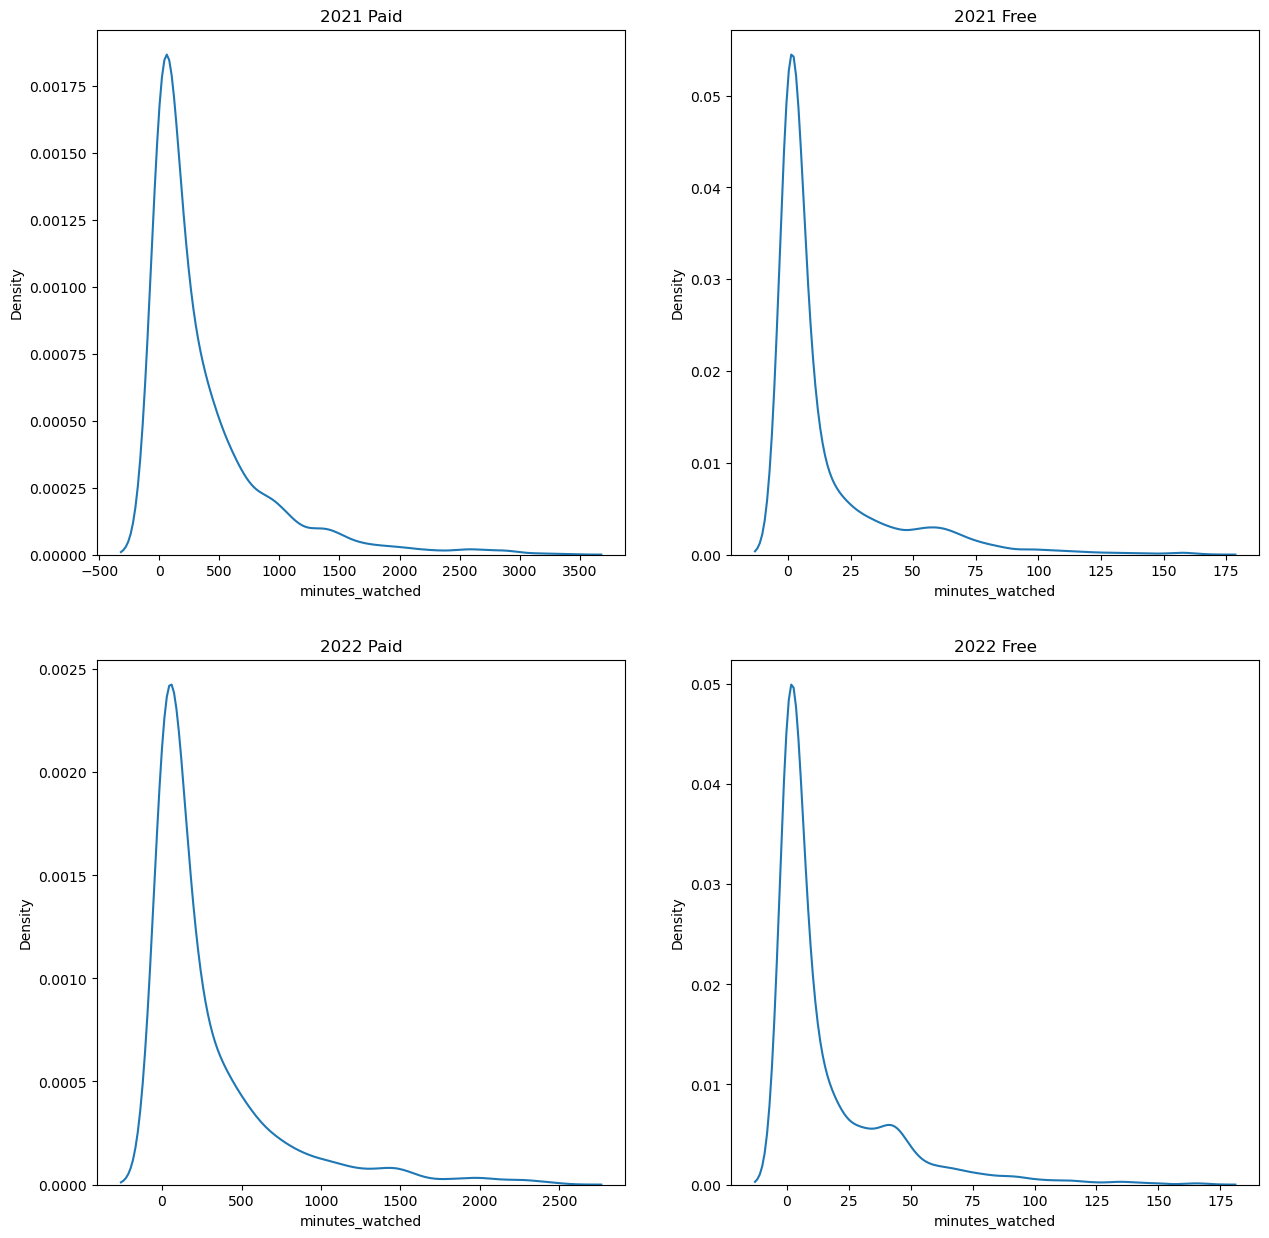

In [7]:
#lets see the kde plot again
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
sns.kdeplot(data=minutes_watched_2021_paid, x='minutes_watched', ax=axs[0, 0])
axs[0, 0].set_title('2021 Paid')
sns.kdeplot(data=minutes_watched_2021_free, x='minutes_watched', ax=axs[0, 1])
axs[0, 1].set_title('2021 Free')
sns.kdeplot(data=minutes_watched_2022_paid, x='minutes_watched', ax=axs[1, 0])
axs[1, 0].set_title('2022 Paid')
sns.kdeplot(data=minutes_watched_2022_free, x='minutes_watched', ax=axs[1, 1])
axs[1, 1].set_title('2022 Free')
plt.show()


The distributions are looking much better now

In [ ]:
#lets save the data without outlier
minutes_watched_2021_paid.to_csv('After_outlier/minutes_watched_2021_paid_1_no_outliers.csv', index=False)
minutes_watched_2021_free.to_csv('After_outlier/minutes_watched_2021_paid_0_no_outliers.csv', index=False)
minutes_watched_2022_paid.to_csv('After_outlier/minutes_watched_2022_paid_1_no_outliers.csv', index=False)
minutes_watched_2022_free.to_csv('After_outlier/minutes_watched_2022_paid_0_no_outliers.csv', index=False)


In [9]:
#lets do the probabiltiy calculation
A=7639
B= 8841
A_and_B= 640
total=15840


In [10]:
P_A=A/total
print("probability of A: ",P_A) 

probability of A:  0.482260101010101


In [11]:
P_B=B/total
print("probability of B: ",P_B)

probability of B:  0.5581439393939394


In [12]:
P_A_and_B=A_and_B/total
print("probability of A and B: ",P_A_and_B)

probability of A and B:  0.04040404040404041


In [13]:
P_A*P_B

0.2691705525902969

Here P(A) X P(B) is not equal to P_A_and_B. Since P(A) X P(B) is larger than P_A_and_B , it suggests that those wo watched a lecture in 2021 are less likely to watch in Q2 2022.

In [14]:
#lets calculate P(A|B)
P_A_given_B=P_A_and_B/P_B

In [15]:
print("probability of A given B: ",P_A_given_B)

probability of A given B:  0.07239000113109378


So among the students who watched the lecture in Q2 2022 , 7 % also had watched a lecture in Q2 2021.

In [16]:
#lets move on to prediction now
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
df=pd.read_csv("minutes_and_certificates.csv")

In [18]:
df.head()

,student_id,minutes_watched,certificates_issued
0,4640.0,586.80,1
1,5836.0,1903.12,3
2,9754.0,702.77,1
3,801.0,6066.00,13
4,2022.0,115.37,1


In [19]:
X=df['minutes_watched']
y=df['certificates_issued']




In [20]:
X.isnull().sum()    

7

In [21]:
X=X.fillna(X.mean())

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

In [23]:
X_train

143      78.13
128    1700.32
597     569.87
20     3192.95
73     2086.00
        ...   
329     556.72
226     215.27
261     714.25
428     513.47
594     778.37
Name: minutes_watched, Length: 526, dtype: float64

In [24]:
reg=LinearRegression()
reg.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

In [25]:
reg.intercept_

1.028701429924495

In [26]:
reg.coef_

array([0.00175515])

In [27]:
reg.score(X_train.values.reshape(-1,1),y_train.values)

0.3075437951557708

In [28]:
#lets predict if someone had watched 1200 minutes of video, how many certificates will be issued
reg.predict([[1200]])


array([3.13487596])

y=1.028+0.00175515 ×1200 ≈3

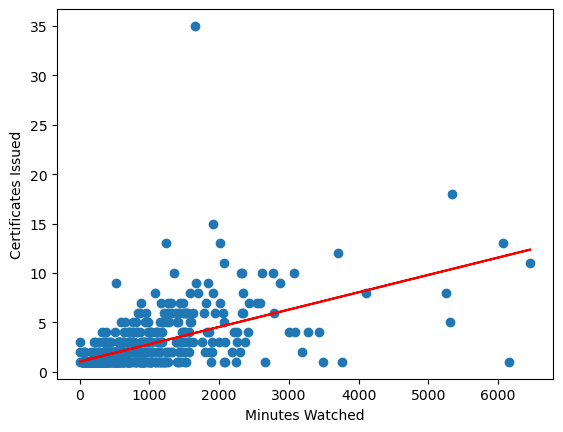

In [29]:
#lets plot the regression line
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train.values.reshape(-1,1)),color='red')
plt.xlabel('Minutes Watched')
plt.ylabel('Certificates Issued')
plt.show()
